# Lista-05 Aprendizagem de Máquina

## Modelo de predição de preços de imóveis

### O modelo pega as informações obtidas pelo dataset [Boston House Price Dataset]( https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data) e utiliza o algoritmo de Regressão Linear para a predição.

### Descrição das colunas

|Nome da Coluna | Descição |
|---------------|----------|
|CRIM|taxa de criminalidade per capita por cidade|
|ZN|proporção de terrenos residenciais zoneada para lotes com mais de 25.000 pés quadrados|
|INDUS|proporção de acres de negócios não varejistas por cidade|
|CHAS|Variável fictícia de Charles River (= 1 se o setor contiver rio; 0 caso contrário)|
|NOX|concentração de óxidos nítricos (partes por 10 milhões)|
|RM |número médio de quartos por habitação|
|AGE|proporção de unidades ocupadas pelo proprietário construídas antes de 1940|
|DIS|distâncias ponderadas para cinco centros de emprego de Boston|
|RAD|índice de acessibilidade a rodovias radiais|
|TAX|taxa de imposto predial de valor integral por US $ 10.000|
|PTRATIO|relação aluno-professor por cidade|
|B| 1000 (Bk - 0,63)² onde Bk é a proporção de negros por cidade|
|LSTAT|menor estado da população|
|MEDV|Valor mediano de residências ocupadas pelo proprietário em 1000 dolares|

In [32]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
import matplotlib.pyplot as pplot

In [33]:
colunas = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
df = pd.read_csv('housing.data', sep="\s+",names=colunas)

### Análise dos dados

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null int64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


In [35]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2310,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7070,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7070,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2180,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2180,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [36]:
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11930,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11930,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11930,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11930,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11930,0,0.573,6.030,80.8,2.5050,1,273.0,21.0,396.90,7.88,11.9


In [37]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11136.778656,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6860.352941,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,460.000000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5190.000000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9690.000000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18100.000000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27740.000000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Dividindo os dados de treino e de teste

In [61]:
X = df[['RM']].values
y = df['MEDV'].values

In [62]:
X

array([[6.575],
       [6.421],
       [7.185],
       [6.998],
       [7.147],
       [6.43 ],
       [6.012],
       [6.172],
       [5.631],
       [6.004],
       [6.377],
       [6.009],
       [5.889],
       [5.949],
       [6.096],
       [5.834],
       [5.935],
       [5.99 ],
       [5.456],
       [5.727],
       [5.57 ],
       [5.965],
       [6.142],
       [5.813],
       [5.924],
       [5.599],
       [5.813],
       [6.047],
       [6.495],
       [6.674],
       [5.713],
       [6.072],
       [5.95 ],
       [5.701],
       [6.096],
       [5.933],
       [5.841],
       [5.85 ],
       [5.966],
       [6.595],
       [7.024],
       [6.77 ],
       [6.169],
       [6.211],
       [6.069],
       [5.682],
       [5.786],
       [6.03 ],
       [5.399],
       [5.602],
       [5.963],
       [6.115],
       [6.511],
       [5.998],
       [5.888],
       [7.249],
       [6.383],
       [6.816],
       [6.145],
       [5.927],
       [5.741],
       [5.966],
       [

In [63]:
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

### Standartização

In [64]:
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten()

### Distribuindo os dados de treino e teste

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y_std, test_size = 0.3, random_state = 42)

### Funções Auxiliares

#### Média quadrática

In [67]:
def rmse(predictions, targets):
    differences = predictions - targets
    differences_squared = differences ** 2
    mean_of_differences_squared = differences_squared.mean()
    rmse_val = np.sqrt(mean_of_differences_squared)
    return rmse_val

#### Plotando o Gráfico

In [68]:
def lin_regplot(X, y, model):
    pplot.scatter(X, y, c='steelblue', edgecolor='white', s=70)
    pplot.plot(X, model.predict(X), color='black', lw=2)
    return None

#### Auxiliar para a função de plotar o gráfico

In [90]:
def graph_plot(X_test, y_test, model):
    lin_regplot(X_test, y_test, model)
    pplot.xlabel('Média por número de quartos')
    pplot.ylabel('Preço em 1000 dolares')
    pplot.show()
    return

### Algoritmo 1 - Regressão Linear com Gradiente Descendente

In [113]:
class LinearRegressionGD(object):

    def __init__(self, eta=0.001, n_iter=20):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return self.net_input(X)

In [114]:
model1 = LinearRegressionGD(eta = 0.0009, n_iter = 500)
model1.fit(X_train, y_train)
pred_y1 = model1.predict(X_test)

### Algoritmo 2 - Regressão Linear do Sklearn

In [115]:
model2 = LinearRegression()
model2.fit(X_train, y_train)
pred_y2 = model2.predict(X_test)


### Algoritmo 3 - Regressão Linear com Gradiente Descendente Estocrástico

In [116]:
model3 = SGDRegressor(eta0=0.0009, n_iter=500)
model3.fit(X_train, y_train)
pred_y3 = model3.predict(X_test)

/home/wendel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


### Comparação dos Gráficos

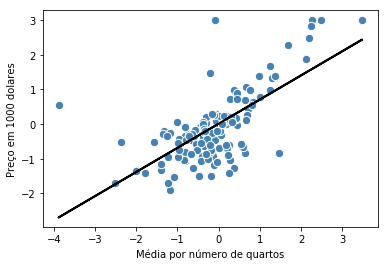

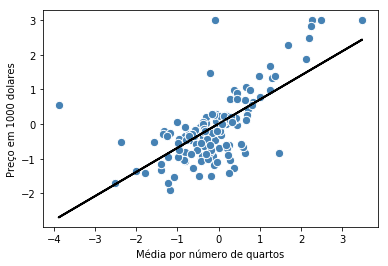

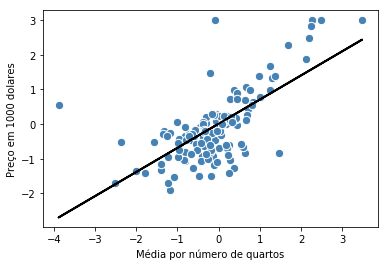

In [122]:
graph_plot(X_test,y_test,model1) #Algoritmo 1
graph_plot(X_test,y_test,model2) #Algoritmo 2
graph_plot(X_test,y_test,model3) #Algoritmo 3

### Comparação das médias

In [123]:
print(  rmse(pred_y, y_test),"\n", #Algoritmo 1
        rmse(pred_y2, y_test),"\n", #Algoritmo 2
        rmse(pred_y3, y_test) #Algoritmo 3
     )

0.7369008581036092 
 0.6913660331691844 
 0.6913683975283615


241-0 48827-5